# Linear Models for Classification

## Import Modules

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, load_breast_cancer, make_blobs
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

### plot_class_regions_for_classifier_subplot

In [3]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

### plot_class_regions_for_classifier

In [51]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

## Data

### Ex1: X_fruits_2d, y_fruits_2d

In [5]:
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [6]:
X_fruits_2d.shape

(59, 2)

In [7]:
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

In [8]:
(X_fruits_2d.as_matrix() != np.array(X_fruits_2d)).sum()

0

### Ex2: X_C2, y_C2

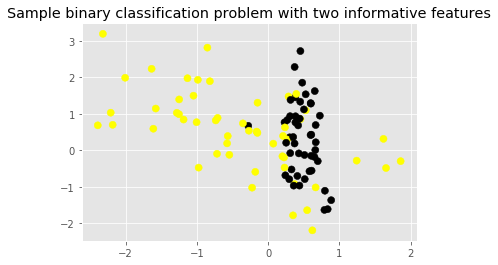

In [9]:
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0) # n_redundant:The number of redundant features. These features are generated as random linear combinations of the informative features.

# n_cluster_per_class: The number of clusters per class
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

### Ex3: X_Cancer, y_Cancer

In [10]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_cancer.shape

(569, 30)

### Ex4: X_D2, y_D2_Blobs Data

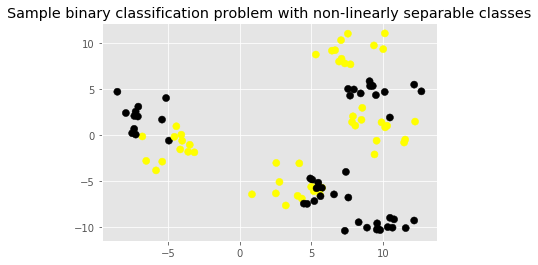

In [11]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

## Logistic Regression

```python
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None,solver='liblinear', max_iter=100, multi_class='ovr', verbose=0,warm_start=False, n_jobs=1)
```
* C: C为正则化系数λ的倒数，通常默认为1
* dual: 对偶或者原始方法。Dual只适用于正则化相为l2 liblinear的情况，通常样本数大于特征数的情况下，默认为False。
* Penalty
    + LogisticRegression默认带了正则化项。penalty参数可选择的值为"l1"和"l2".分别对应L1的正则化和L2的正则化，默认是L2的正则化。
    + 在调参时如果我们主要的目的只是为了解决过拟合，一般penalty选择L2正则化就够了。但是如果选择L2正则化发现还是过拟合，即预测效果差的时候，就可以考虑L1正则化。另外，如果模型的特征非常多，我们希望一些不重要的特征系数归零，从而让模型系数稀疏化的话，也可以使用L1正则化。
    + penalty参数的选择会影响我们损失函数优化算法的选择。即参数solver的选择，如果是L2正则化，那么4种可选的算法{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}都可以选择。但是如果penalty是L1正则化的话，就只能选择‘liblinear’了。这是因为L1正则化的损失函数不是连续可导的，而{‘newton-cg’, ‘lbfgs’,‘sag’}这三种优化算法时都需要损失函数的一阶或者二阶连续导数。而‘liblinear’并没有这个依赖。
* fit_intercept: 是否存在截距，默认存在
* intercept_scaling: 仅在正则化项为"liblinear"，且fit_intercept设置为True时有用。
* solver='liblinear': solver参数决定了我们对逻辑回归损失函数的优化方法，有四种算法可以选择，分别是：

    + liblinear：使用了开源的liblinear库实现，内部使用了坐标轴下降法来迭代优化损失函数。
    + lbfgs：拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    + newton-cg：也是牛顿法家族的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    + sag：即随机平均梯度下降，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。

	* 从上面的描述可以看出，newton-cg, lbfgs和sag这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的L1正则化，只能用于L2正则化。而liblinear通吃L1正则化和L2正则化。
	* 同时，sag每次仅仅使用了部分样本进行梯度迭代，所以当样本量少的时候不要选择它，而如果样本量非常大，比如大于10万，sag是第一选择。但是sag不能用于L1正则化，所以当你有大量的样本，又需要L1正则化的话就要自己做取舍了。要么通过对样本采样来降低样本量，要么回到L2正则化。
	* 从上面的描述，大家可能觉得，既然newton-cg, lbfgs和sag这么多限制，如果不是大样本，我们选择liblinear不就行了嘛！错，因为liblinear也有自己的弱点！我们知道，逻辑回归有二元逻辑回归和多元逻辑回归。对于多元逻辑回归常见的有one-vs-rest(OvR)和many-vs-many(MvM)两种。而MvM一般比OvR分类相对准确一些。郁闷的是liblinear只支持OvR，不支持MvM，这样如果我们需要相对精确的多元逻辑回归时，就不能选择liblinear了。也意味着如果我们需要相对精确的多元逻辑回归不能使用L1正则化了。

* multi_class='ovr'/'multinomial: ovr即前面提到的one-vs-rest(OvR)，而multinomial即前面提到的many-vs-many(MvM)。如果是二元逻辑回归，ovr和multinomial并没有任何区别，区别主要在多元逻辑回归上。
	* OvR和MvM有什么不同？
      OvR的思想很简单，无论你是多少元逻辑回归，我们都可以看做二元逻辑回归。具体做法是，对于第K类的分类决策，我们把所有第K类的样本作为正例，除了第K类样本以外的所有样本都作为负例，然后在上面做二元逻辑回归，得到第K类的分类模型。其他类的分类模型获得以此类推。
      而MvM则相对复杂，这里举MvM的特例one-vs-one(OvO)作讲解。如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类。
      可以看出OvR相对简单，但分类效果相对略差（这里指大多数样本分布情况，某些样本分布下OvR可能更好）。而MvM分类相对精确，但是分类速度没有OvR快。如果选择了ovr，则4种损失函数的优化方法liblinear，newton-cg,lbfgs和sag都可以选择。但是如果选择了multinomial,则只能选择newton-cg, lbfgs和sag了。


### Ex1-LogisticRegression()

In [12]:
# (positive class: apple, negative class: others)
y_fruits_apple = y_fruits_2d == 1

In [13]:
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = train_test_split(
    X_fruits_2d.as_matrix(), y_fruits_apple.as_matrix(),random_state = 0)

clf = LogisticRegression(C=100).fit(X_train, y_train)
clf

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


### Ex1-LogisticRegressionCV()

In [23]:
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = train_test_split(
    X_fruits_2d.as_matrix(), y_fruits_apple.as_matrix(),random_state = 0)

clfcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))).fit(X_train, y_train)
clfcv

LogisticRegressionCV(Cs=[1e-10, 1.0000000000000001e-09, 1e-08, 9.9999999999999995e-08, 9.9999999999999995e-07, 1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0],
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [24]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clfcv.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clfcv.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


In [28]:
clfcv.scores_[1].mean(axis=0).max() # gives the score for all the folds

0.79523809523809519

In [37]:
clfcv.scores_[1].max() #  is wrong

0.93333333333333335

### Ex1-GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
grid = {'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['lbfgs']}
clfgs = GridSearchCV(LogisticRegression(), grid, cv=3)
clfgs.fit(X_train, y_train)

print ('clfgs.best_score_:', clfgs.best_score_)

# The (small) remaining difference might come from warm starting in LogisticRegressionCV (which is actually what makes it faster than GridSearchCV).

clfgs.best_score_: 0.795454545455


### LR-Ex2

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


### LR-Ex3

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### Logistic regression regularization: C parameter

#### Ex1

In [17]:
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

for this_C in [0.1, 1, 100]:
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    print('When C={}, Then the Accuracy of LRC on training set and test set are: {:.2f} and {:.2f}'
     .format(this_C, clf.score(X_train, y_train), clf.score(X_test, y_test)))

When C=0.1, Then the Accuracy of LRC on training set and test set are: 0.57 and 0.67
When C=1, Then the Accuracy of LRC on training set and test set are: 0.68 and 0.60
When C=100, Then the Accuracy of LRC on training set and test set are: 0.77 and 0.73


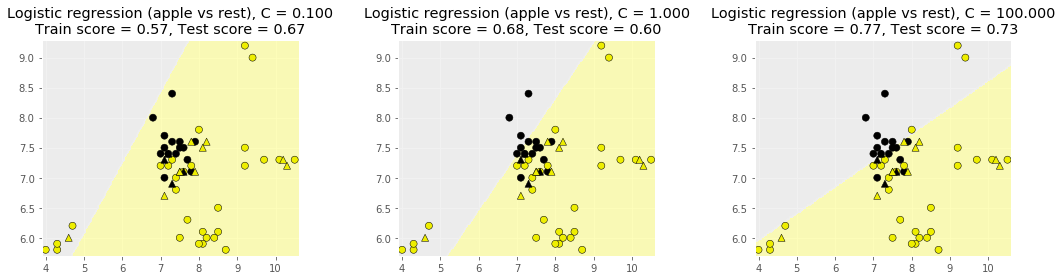

In [29]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(1, 3, figsize=(15, 4))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()
plt.show()

#### Ex2

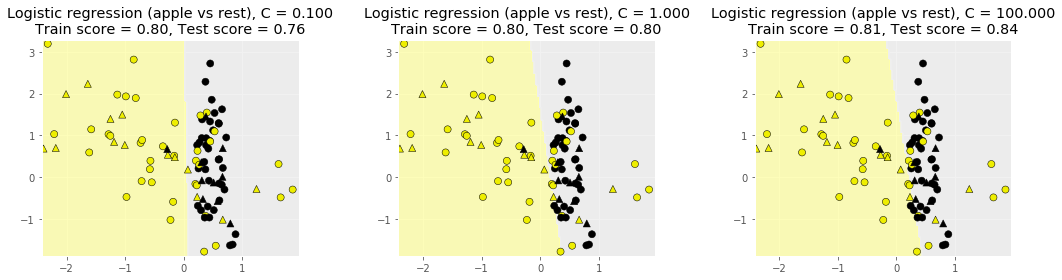

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 3, figsize=(15, 4))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()
plt.show()

## Support Vector Machines

### Linear Support Vector Machine

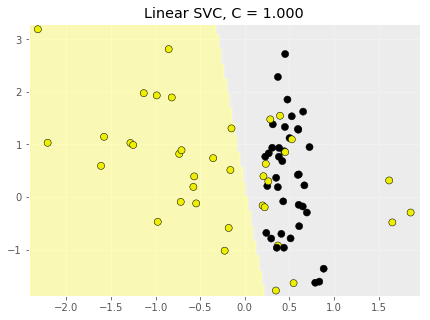

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf0 = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf0, X_train, y_train, None, None, title, subaxes)
plt.show()

In [36]:
clf0

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Linear Support Vector Machine: C parameter

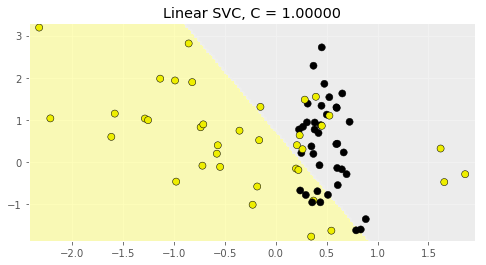

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(8, 4))

clf1 = LinearSVC(C=100).fit(X_train, y_train)
title = 'Linear SVC, C = {:.5f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf1, X_train, y_train,
                                             None, None, title, subaxes)
plt.show()

In [39]:
for this_C in [0.00001, 100]:
    clf1 = LinearSVC(C=this_C).fit(X_train, y_train)
    r2_train = clf1.score(X_train, y_train)
    r2_test = clf1.score(X_test, y_test)
    print('C = {:.2f}, r-squared training: {:.2f}, r-squared test: {:.2f}'.format(this_C, r2_train, r2_test))

C = 0.00, r-squared training: 0.76, r-squared test: 0.76
C = 100.00, r-squared training: 0.81, r-squared test: 0.80


In [40]:
# real data-Cancer data
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf2 = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.92
Accuracy of Linear SVC classifier on test set: 0.94


In [41]:
clf0

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
clf1

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [43]:
clf2

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Multi-class classification with linear models

###  LinearSVC with M classes generates M one vs rest classifiers

In [44]:
X_fruits_2d.head()

,height,width
0,7.3,8.4
1,6.8,8.0
2,7.2,7.4
3,4.7,6.2
4,4.6,6.0


In [45]:
y_fruits_2d.unique()

array([1, 2, 3, 4], dtype=int64)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.23401135  0.72246132]
 [-1.63231901  1.15222281]
 [ 0.0849835   0.31186707]
 [ 1.26189663 -1.68097   ]]
Intercepts:
 [-3.31753728  1.19645936 -2.7468353   1.16107418]


###  Multi-class results on the fruit dataset

In [47]:
np.linspace(-10,15,3)

array([-10. ,   2.5,  15. ])

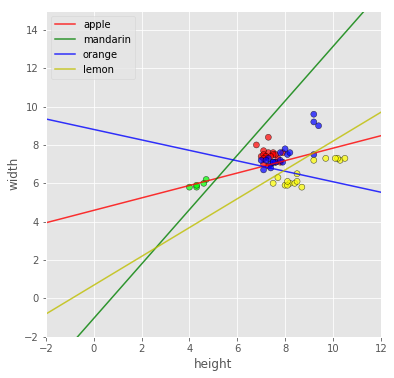

In [48]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)
x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)

plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

# Kernelized Support Vector Machines

## Classification

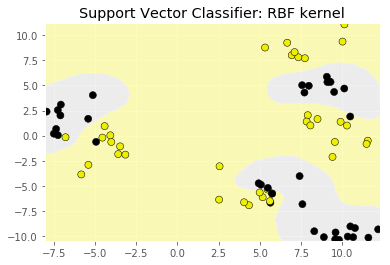

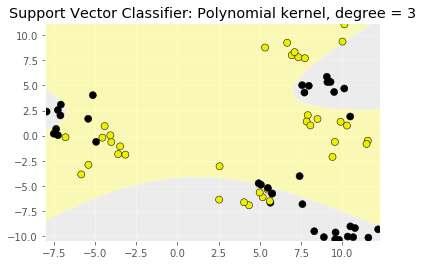

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

## RBF kernel: gamma

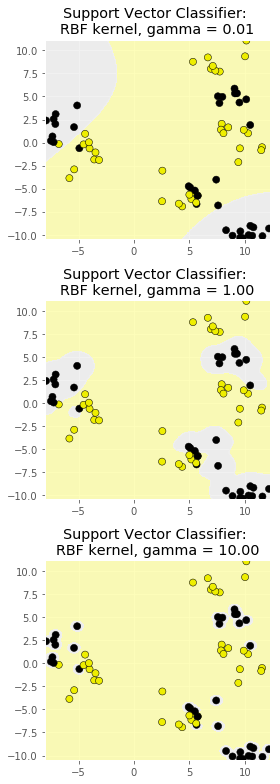

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))
print(subaxes)
for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subplot)
    plt.tight_layout()
plt.show()

## RBF kernel: C and gamma

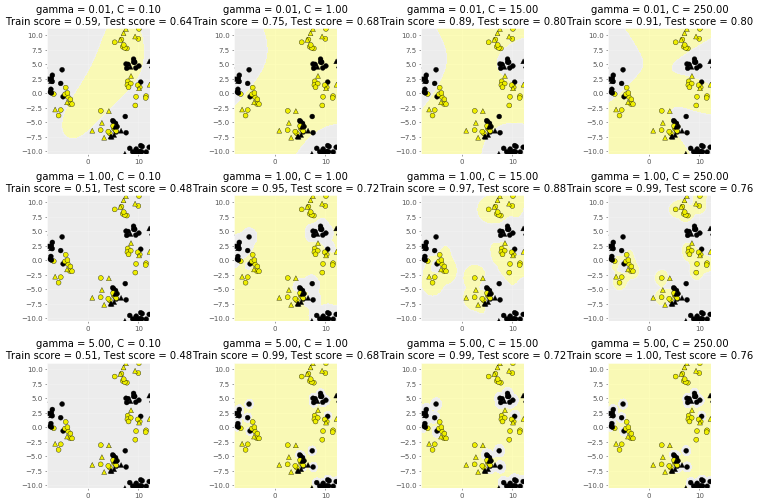

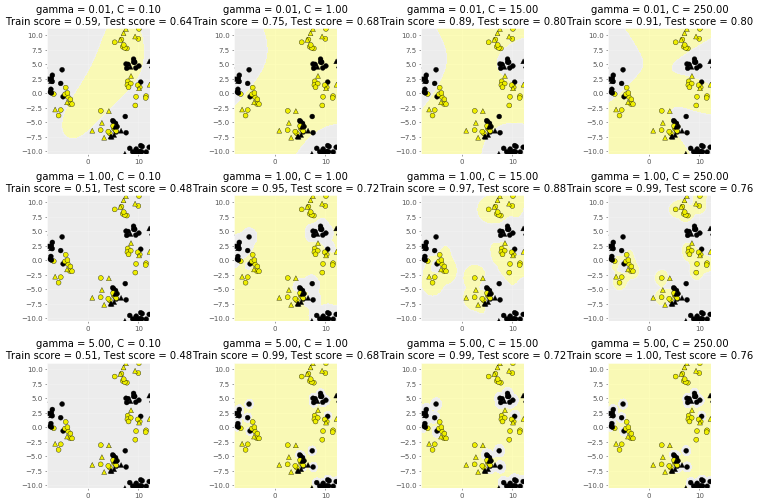

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [58]:
X_D2.shape

(100, 2)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

for this_gamma in [0.01, 1, 5]:    
    for this_C in [0.1, 1, 15, 250]:
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        print('When gamma={} and C={}, The train score and test score are {:.3f} and {:.3f}'
             .format(this_gamma, this_C, train_score, test_score))

When gamma=0.01 and C=0.1, The train score and test score are 0.587 and 0.640
When gamma=0.01 and C=1, The train score and test score are 0.747 and 0.680
When gamma=0.01 and C=15, The train score and test score are 0.893 and 0.800
When gamma=0.01 and C=250, The train score and test score are 0.907 and 0.800
When gamma=1 and C=0.1, The train score and test score are 0.507 and 0.480
When gamma=1 and C=1, The train score and test score are 0.947 and 0.720
When gamma=1 and C=15, The train score and test score are 0.973 and 0.880
When gamma=1 and C=250, The train score and test score are 0.987 and 0.760
When gamma=5 and C=0.1, The train score and test score are 0.507 and 0.480
When gamma=5 and C=1, The train score and test score are 0.987 and 0.680
When gamma=5 and C=15, The train score and test score are 0.987 and 0.720
When gamma=5 and C=250, The train score and test score are 1.000 and 0.760


# Cross_validation

sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)

## Example based on k-NN classifier with fruit dataset (2 features)

In [9]:
clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y) # the default is cv=3

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.77272727  0.73684211  0.83333333]
Mean cross-validation score (3-fold): 0.781


In [10]:
cv_scores

array([ 0.77272727,  0.73684211,  0.83333333])

## Validation curve example

In [12]:
# This code will feed three models using a RBF using SVM on different subests of the data corresponding to the 
# three different specify values of the kernel gamma parameter.  It will returns 2 (4x3) arrays, that is 4 levels 
# of gamma and times 3 fits per level containing the results of the training and test sets. It can give you an idea
# of hose sensitive the performance of the model is to changes to the given parameters. The x-axis correponds to values
# of the parameter, and the y-axis gives the evaluation score (accuraccy in a classifier)
# It is taking the fruis data with two features and y has the lables

# Gamma values : array([  1.00e-03,   1.00e-01,   1.00e+01,   1.00e+03])
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [13]:
param_range

array([  1.00000000e-03,   1.00000000e-01,   1.00000000e+01,
         1.00000000e+03])

In [14]:
train_scores

array([[ 0.48648649,  0.425     ,  0.41463415],
       [ 0.83783784,  0.725     ,  0.75609756],
       [ 0.91891892,  0.9       ,  0.92682927],
       [ 1.        ,  1.        ,  0.97560976]])

In [15]:
test_scores

array([[ 0.45454545,  0.31578947,  0.33333333],
       [ 0.81818182,  0.68421053,  0.61111111],
       [ 0.40909091,  0.84210526,  0.66666667],
       [ 0.36363636,  0.21052632,  0.38888889]])

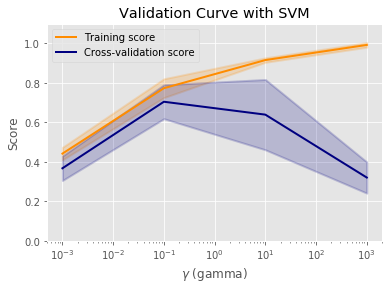

In [16]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()